# EDA for the Minerva Roads Hackathon
This EDA will try to load in an play with the newly acquired road data from Minerva 

In [63]:
# Load in the data and inspect in
import geopandas as gpd
import pandas as pd
import seaborn as sn
from pathlib import Path


# Load a shape file of world lakes as a GeoDataFrame:
path = Path('C:\\Users\\mlind\\github\\Minerva_hackathon\\data\\split segments\\road_merge_split_08112023.shp')
roman_roads: gpd.GeoDataFrame = gpd.read_file(path)
print(roman_roads.head(3))
roman_roads_length_gpd = gpd.GeoDataFrame(
    data={"length" : roman_roads["geometry"].length, "name" : roman_roads["Name"]},
    geometry=roman_roads["geometry"]
)


# We need to save the projection and the units used for the geometry for future reference

projection = roman_roads.crs
units = roman_roads.crs.axis_info[0].unit_name


# roman_roads_length_gpd["geometry"] = roman_roads["geometry"]
# roman_roads_length_gpd["length"] = roman_roads_length_gpd["geometry"].length


   OBJECTID  Id                 Name  Route_Type       Type  Lower_Date  \
0         0   0  Fanum Fortunae-Rome           0  Main Road         0.0   
1         0   0  Fanum Fortunae-Rome           0  Main Road         0.0   
2         0   0  Fanum Fortunae-Rome           0  Main Road         0.0   

   Low_Date_E  Upper_Date  Up_Date_E Descriptio  ...    Segment_s Shape_Le_1  \
0           0         0.0          0       None  ...  Conjectured        0.0   
1           0         0.0          0       None  ...  Conjectured        0.0   
2           0         0.0          0       None  ...  Conjectured        0.0   

   GeoJson     Shape_Le_2 Source Length  Notes ORIG_FID  ORIG_SEQ  \
0     None  356120.055513   None    0.0   None        0         1   
1     None  356120.055513   None    0.0   None        0         4   
2     None  356120.055513   None    0.0   None        0         5   

                                            geometry  
0  LINESTRING (1448922.974 5411758.148, 144864

          length                 name  \
0  144071.867661  Fanum Fortunae-Rome   
1   98678.644750  Fanum Fortunae-Rome   
2    6998.572509  Fanum Fortunae-Rome   

                                            geometry  
0  LINESTRING (1448922.974 5411758.148, 1448648.0...  
1  LINESTRING (1393279.923 5209929.068, 1393489.0...  
2  LINESTRING (1387773.098 5122916.212, 1387965.8...  


<Axes: ylabel='length'>

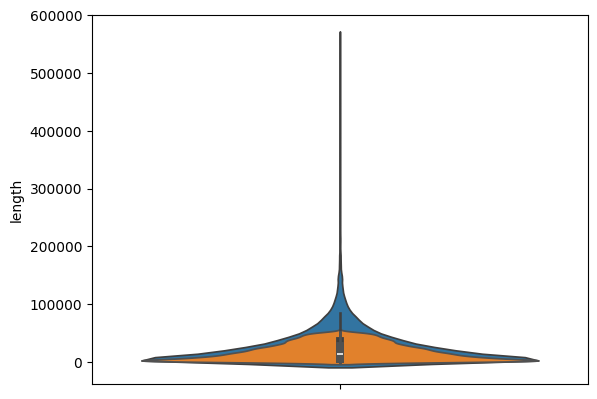

In [64]:
print(roman_roads_length_gpd.head(3))
sn.violinplot(roman_roads_length_gpd["length"])
roman_roads_length_gpd_85: pd.Series = roman_roads_length_gpd[roman_roads_length_gpd["length"].between(roman_roads_length_gpd["length"].quantile(.05), roman_roads_length_gpd["length"].quantile(.85))]
sn.violinplot(roman_roads_length_gpd_85["length"])


<Axes: ylabel='length'>

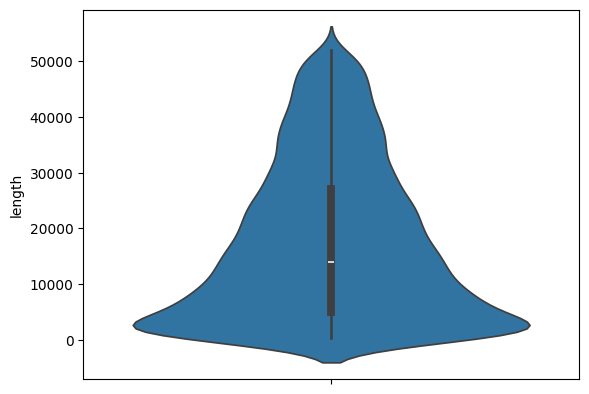

In [65]:
sn.violinplot(roman_roads_length_gpd_85["length"])


              length
count   13871.000000
mean    23884.845642
std     23208.823663
min        16.576930
25%      5475.915014
50%     16647.009283
75%     35498.214411
max    107298.028419
           length                 name  \
1    98678.644750  Fanum Fortunae-Rome   
2     6998.572509  Fanum Fortunae-Rome   
3    79370.605608  Fanum Fortunae-Rome   
4    27000.364986  Fanum Fortunae-Rome   
5    69884.368625   Nequinum-Fulginiae   
6    16485.492820   Nequinum-Fulginiae   
7    14544.626975         Rome-Aretium   
8    22962.797789         Rome-Aretium   
9   100195.167296         Rome-Aretium   
10  100781.371168         Rome-Aretium   

                                             geometry  
1   LINESTRING (1393279.923 5209929.068, 1393489.0...  
2   LINESTRING (1387773.098 5122916.212, 1387965.8...  
3   LINESTRING (1413955.084 5276704.288, 1412614.3...  
4   LINESTRING (1423067.031 5300521.304, 1422773.1...  
5   LINESTRING (1413955.084 5276704.288, 1414551.3...  
6   LINESTRI

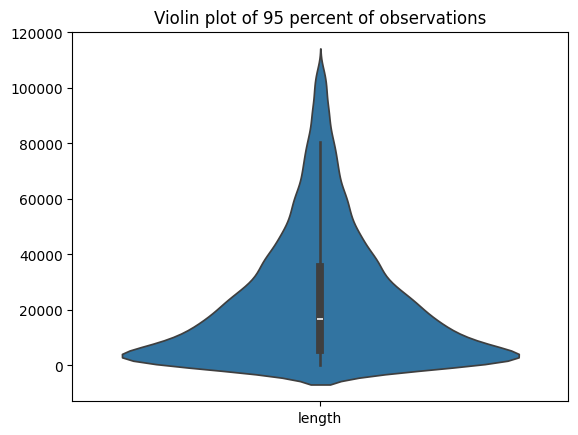

In [72]:
# Some of the outliers are extreme. We need to look at them an figure out
#   Where an what they are
#   If they are artefacts or proper roads segments
#   What sort of units they are in

roman_roads_length_gpd_95_outliers = roman_roads_length_gpd[roman_roads_length_gpd["length"].between(roman_roads_length_gpd["length"].quantile(.025), roman_roads_length_gpd["length"].quantile(.975))]
plot = sn.violinplot(roman_roads_length_gpd_95_outliers)
plot.set_title("Violin plot of 95 percent of observations")
print(roman_roads_length_gpd_95_outliers.describe())
roman_roads_length_gpd_95_outliers.sort_values(by="length")
print(roman_roads_length_gpd_95_outliers.head(10))

# These roads seems to be very long, this will need to be checked if this is a problem with the projection or the calculation of the length. 

[]

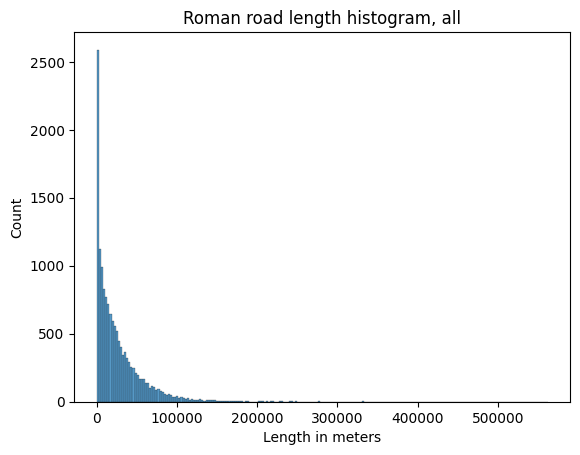

In [67]:
# Here we make bins and a histogram of the length og the roads
plot = sn.histplot(roman_roads_length_gpd, x = "length")
plot.set_title("Roman road length histogram, all")
plot.set_xlabel("Length in meters")
plot.plot()

[]

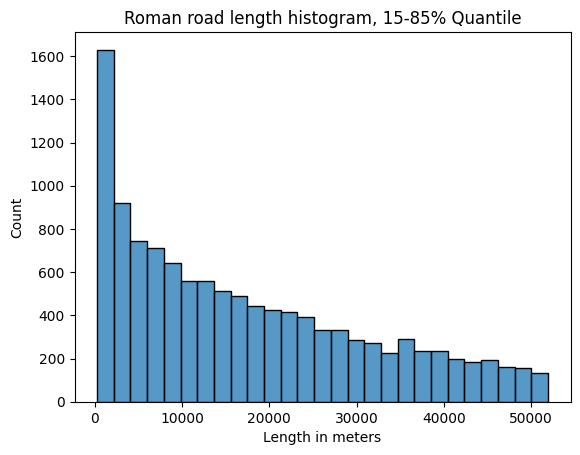

In [68]:
plot = sn.histplot(roman_roads_length_gpd_85, x = "length")
plot.set_title("Roman road length histogram, 15-85% Quantile")
plot.set_xlabel("Length in meters")
plot.plot()


[]

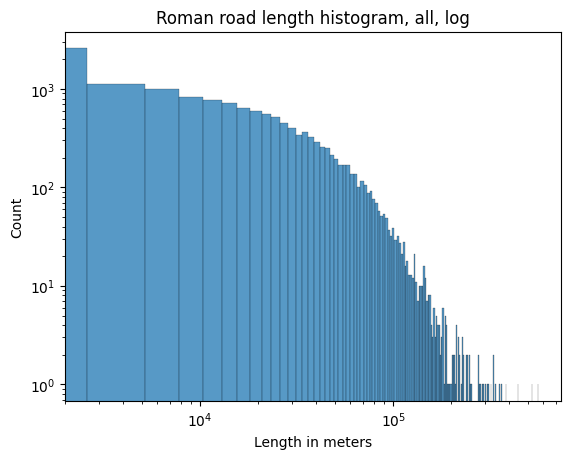

In [69]:
plot = sn.histplot(roman_roads_length_gpd, x = "length")
plot.set_title("Roman road length histogram, all, log")
plot.set_yscale("log")
plot.set_xscale("log")
plot.set_xlabel("Length in meters")
plot.plot()

In [70]:
# The length coloumn seems very weird, lets look at it!
print(roman_roads_length_gpd["length"].describe())
print(roman_roads_length_gpd[roman_roads_length_gpd["length"] < 1])


count     14601.000000
mean      26528.915608
std       32008.872705
min           0.000000
25%        5032.165860
50%       16647.009283
75%       36924.460323
max      562589.796583
Name: length, dtype: float64
         length                      name  \
243    0.655841            Neapolis-Capua   
361    0.820220   Sirpium-Cerreto-Sannita   
432    0.004206        Hostilia-Vipitenum   
496    0.001098            Clavenna-Curia   
497    0.001098            Clavenna-Curia   
...         ...                       ...   
11269  0.118134                 Zabi-Aras   
11413  0.385717                Zabi-Macri   
11414  0.057811                Zabi-Macri   
14470  0.494463  Laodicea ad Mare-Antioch   
14579  0.613525  Antioch-Chalcis ad Belum   

                                                geometry  
243    LINESTRING (1586772.089 4996369.172, 1586772.2...  
361    LINESTRING (1631859.576 5034516.074, 1631860.1...  
432    LINESTRING (1294436.904 5874523.218, 1294436.9...  
496    LIN

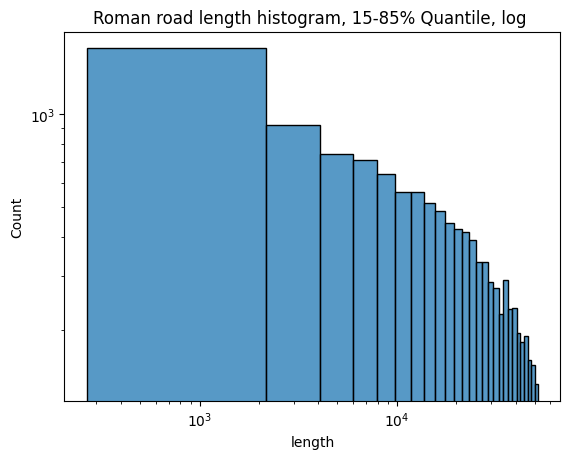

In [51]:
plot = sn.histplot(roman_roads_length_gpd_85, x = "length")
plot.set_title("Roman road length histogram, 15-85% Quantile, log ")
plot.set_xscale("log")
plot.set_yscale("log")


In [74]:
# Now we try to filter all roads that are less then on kilometer long
roman_roads_length_gpd_filtered = roman_roads_length_gpd[roman_roads_length_gpd["length"] > 1000]

[]

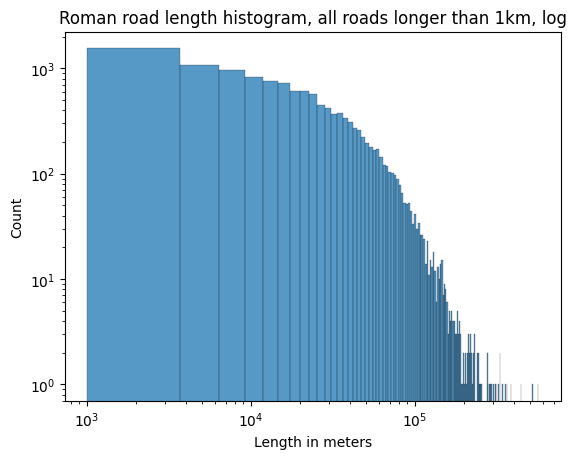

In [76]:
plot = sn.histplot(roman_roads_length_gpd_filtered, x = "length")
plot.set_title("Roman road length histogram, all roads longer than 1km, log")
plot.set_yscale("log")
plot.set_xscale("log")
plot.set_xlabel("Length in meters")
plot.plot()

In [ ]:
plot = sn.histplot(roman_roads_length_gpd, x = "length")
plot.set_title("Roman road length histogram, all roads longer than 1km")
plot.set_xlabel("Length in meters")
plot.plot()